In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./LSTM_prediction.csv')

In [3]:
df['combined_tweet_txt'].isna().sum()

277

In [4]:
l=df['prediction'].values.tolist()

In [5]:
pos=0
neg=0
neu=0
for i in range(len(l)):
    if l[i]==1:
        pos+=1
    elif l[i]==0:
        neu+=1
    else:
        neg+=1
print('total:',len(l),'1:',pos,'-1:',neg,'0:',neu)

total: 357474 1: 2814 -1: 85471 0: 269189


In [6]:
df0=df.loc[df['prediction']== 1]

In [7]:
df0['combined_tweet_txt'].isna().sum()

0

In [8]:
pos_text=df0['combined_tweet_txt'].values.tolist()

In [9]:
len(pos_text)

2814

In [10]:
pos_txt=pd.DataFrame(pos_text,columns=['pos_txt'])
# pos_txt.to_csv('/Users/Xiilz./Desktop/lstm_pos_text.csv',index=False)

# Features Extraction & KMeans Clustering

tf-idf

In [11]:
def tfidf_weight(text):
    corpus=[]   
    for i in range(len(text)):
        corpus.append(text[i].strip())

    vectorizer=CountVectorizer()
    transformer=TfidfTransformer()
    tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
    word=vectorizer.get_feature_names()
#     weight=tfidf.toarray()
    return tfidf, corpus

In [12]:
weight,corpus=tfidf_weight(pos_text)
clf=KMeans(n_clusters=5)
s=clf.fit(weight)

combine the cluster labels with text

In [14]:
class LabelText(object):
    def __init__(self, label_list, ori_path):
        self.label_list = label_list
        self.ori_path = ori_path


    def arrangeLabelText(self, show=True, write=False):
        abs_path = os.path.abspath(self.ori_path)
        if write == True:
            write_path = '/'.join(abs_path.split('/')[:-1]) + '/labelText.csv'
            w = open(write_path, 'w')
        with open(self.ori_path, 'r') as o:
            for l, s in zip(self.label_list, o.readlines()):
                try:
                    line = str(l) + "\t" + str(s.strip())
                    if write == True:
                        w.write(line)
                        w.write('\n')
                except:
                    print("--------SOMETHING WRONG!-------")
                    continue
            if write == True:
                w.close()


    def sortByLabel(self, show=True, write=False):
        abs_path = os.path.abspath(self.ori_path)
        if write == True:
            write_path = '/'.join(abs_path.split('/')[:-1]) + '/5_clusters_lstm_pos_tweets.csv'
            print ("new file saved in " + write_path)
            w = open(write_path, 'w')
        with open(self.ori_path, 'r') as o:
            index = np.argsort(self.label_list)
            ori_lines = o.readlines()
            for i in range(len(index)):
                try:
                    line = str(self.label_list[index[i]]) + '\t' + str(ori_lines[index[i]].strip())
                    if write == True:
                        w.write(line)
                        w.write('\n')
                except:
                    print("--------SOMETHING WRONG!-------")
                    continue
            if write == True:
                w.close()

In [15]:
label=clf.labels_
ori_path='/Users/Xiilz./Desktop/lstm_pos_text.csv'
# label_and_text=LabelText(label,ori_path)
# label_and_text.sortByLabel(write=True)

# Sampling

In [16]:
def groupby(dataframe):
    dt=dataframe.groupby('text',as_index=False).apply(lambda df:df.drop_duplicates('cluster')).reset_index()
    dt1=dt[['cluster','text']]
    return dt1

In [17]:
def get_sample(dataframe):
    dt_sample=dataframe.sample(n=10)
#     dt_sample.to_csv('/Users/Xiilz./Desktop/sample_clusters_lstm_pos_tweets.csv', columns=['cluster','text'], mode='a')
    return dt_sample

In [18]:
def main():
    for i in clusters:
        temp_df=df[df['cluster'].isin([i])]
        dataframe=temp_df
        dt=groupby(dataframe)
        result=get_sample(dt)
        return result

In [19]:
c=[2,3,5]
for i in c:
    filename='/Users/Xiilz./Desktop/540 Project/Cluster/lstm_pos_clustering/'+ str(i) + '_clusters_lstm_pos_tweets.csv'    
    df=pd.read_csv(filename,delimiter='\t',header=None)
    df.columns=['cluster','text']
    clusters=df['cluster'].unique()  
    for j in clusters:
        temp_df=df[df['cluster'].isin([j])]
        dataframe=temp_df
        dt=groupby(dataframe)
        get_sample(dt)

In [22]:
df_neg = pd.read_csv('/Users/Xiilz./Desktop/540 Project/Cluster/lstm_clustering_samples/sample_clusters_lstm_pos_tweets.csv')
l = list(df_neg['text'])

In [23]:
l1=[]
for i in l:
    l1.append(i.replace('vid','covid'))   

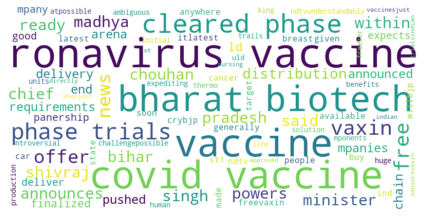

In [24]:
stri=''
text = stri.join(l1[1:10])
wc = WordCloud(scale=2, max_font_size=100, background_color = 'white')
wc.generate(text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()